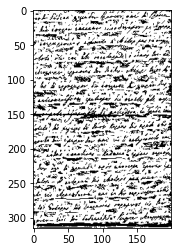

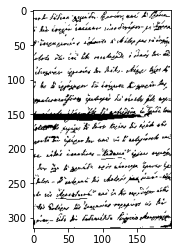

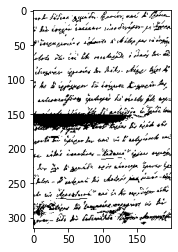

In [5]:
import sys
import numpy as np
import matplotlib.pyplot as plt 

from PIL import Image

def katwfliwsh_eikonas(image, threshold):
    #res = np.zeros_like(image)
    #res[image < threshold] = 0
    #res[image >=threshold] = 255
    #return( np.uint8(res) )
    if image < threshold :
        return (0)
    else:
        return(255)

def ypologise_antikeimeniki_otsu(A, k):
    pixels_tmima1 = A[A < k]
    pixels_tmima2 = A[A >=k]
    mu1 = np.mean(pixels_tmima1)
    mu2 = np.mean(pixels_tmima2)
    mu_synoliko = np.mean(A.flatten())
    pi1 = len(pixels_tmima1) / (len(pixels_tmima1) + len(pixels_tmima2))
    pi2 = len(pixels_tmima2) / (len(pixels_tmima1) + len(pixels_tmima2))
    antikeimeniki_synartisi = pi1 * (mu1 - mu_synoliko)**2 + pi2 * (mu2 - mu_synoliko)**2
    return(antikeimeniki_synartisi)

def otsu_thresholder(image):
    kalytero_katwfli = 0
    kalyterh_timi = 0
    for i in range(1, 256, 10):
        obj_otsu = ypologise_antikeimeniki_otsu(image, i)
        if(obj_otsu > kalyterh_timi):
            kalytero_katwfli = i 
            kalyterh_timi = obj_otsu
    #res = katwfliwsh_eikonas(image, kalytero_katwfli)
    #print(kalytero_katwfli, kalyterh_timi)
    #return(res)
    return(kalytero_katwfli)

def check_high_bound(value, bound):
    while value>=bound:
        value-=1
    return(value)
    
def check_low_bound(value):
    while value<0:
        value+=1
    return(value)

def main(window):
    image = np.array(Image.open('trikoupi6_low.png')) # opening image as an array
    window_size = window
    h, w = image.shape # keeping the width and the height of the png
    height = int(h)
    width = int(w)

    threshold_array = np.zeros(shape=(height,width))
    final_image = np.ones(shape=(height,width))

    if(len(image.shape)<3): # check if image is rgb or gray scale
        image = image
    elif len(image.shape)==3:
        image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140]) # rbg to grayscale

    for i in range(0,height):
        for j in range(0,width):
            #print('current pixel : ' + str(image[i][j]))
            if window_size % 2 == 0: # Even
                temp_image = np.zeros(shape=(window_size,window_size))
                temp_mid = int(window_size/2)
                temp_image[temp_mid-1][temp_mid-1] = image[i][j]
                
                start_w = i - (temp_mid-1)
                start_w = check_low_bound(start_w)
                end_w   = i + temp_mid
                end_w = check_high_bound(end_w,height)
                
                start_z = j - (temp_mid-1)
                start_z = check_low_bound(start_z)
                end_z   = j + temp_mid
                end_z = check_high_bound(end_z,width)
    
                temp_image = np.zeros(shape=(end_w-start_w+1,end_z-start_z+1))
                
                temp_x=-1
                for w in range(start_w,end_w+1):
                    temp_x+=1
                    temp_y=-1
                    for z in range(start_z,end_z+1):
                        temp_y+=1
                        temp_image[temp_x][temp_y] = image[w][z]
                
                threshold = otsu_thresholder(temp_image)
                final_image[i][j] = katwfliwsh_eikonas(image[i][j],threshold)
            else:                    # Odd
                temp_image = np.zeros(shape=(window_size,window_size))
                temp_mid = int(np.ceil(window_size/2))
                temp_image[temp_mid-1][temp_mid-1] = image[i][j]
                
                start_w = i - (temp_mid-1)
                start_w = check_low_bound(start_w)
                end_w   = i + (temp_mid-1)
                end_w = check_high_bound(end_w,height)
                
                start_z = j - (temp_mid-1)
                start_z = check_low_bound(start_z)
                end_z   = j + (temp_mid-1)
                end_z = check_high_bound(end_z,width)
                
                temp_image = np.zeros(shape=(end_w-start_w+1,end_z-start_z+1))
                
                temp_x=-1
                for w in range(start_w,end_w+1):
                    temp_x+=1
                    temp_y=-1
                    for z in range(start_z,end_z+1):
                        temp_y+=1
                        temp_image[temp_x][temp_y] = image[w][z]
                
                threshold = otsu_thresholder(temp_image)
                final_image[i][j] = katwfliwsh_eikonas(image[i][j],threshold)
                

    return (final_image)


image = main(8)
plt.imshow(image, cmap="gray")  # Showing the image
plt.show()

image = main(25)
plt.imshow(image, cmap="gray")  # Showing the image
plt.show()

image = main(50)
plt.imshow(image, cmap="gray")  # Showing the image
plt.show()